In [16]:
import os 
import shutil
import pathlib
from keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
from keras import layers,models
import keras

In [4]:
new_dir=pathlib.Path("men_women_dataset")

def make_subset(base_dir,subset_dir,start,end):
    for category in ("men","women"):
        dir=new_dir/subset_dir/category
        if not os.path.exists(dir):
            os.makedirs(dir)
        files=os.listdir(os.path.join(base_dir,category))
        fnames=[files[i] for i in range(start,end)]
        for fname in fnames:
            shutil.copyfile(src=os.path.join(base_dir,category,fname),dst=os.path.join(dir,fname))

In [5]:
make_subset("traindata/traindata","validation",start=0,end=200)
make_subset("traindata/traindata","train",start=200,end=999)
make_subset("testdata/testdata","test",start=0,end=400)

In [21]:
print('train dataset:')
train_dataset=image_dataset_from_directory(
    'men_women_dataset/train',
    image_size=(128,128),
    batch_size=32,
    label_mode='binary'
)

print('validation dataset:')
validation_dataset=image_dataset_from_directory(
    'men_women_dataset/validation',
    image_size=(128,128),
    batch_size=32,
    label_mode='binary'
)

print('test dataset:')
test_dataset=image_dataset_from_directory(
    'men_women_dataset/test',
    image_size=(128,128),
    batch_size=32,
    label_mode='binary'
)

train dataset:
Found 1598 files belonging to 2 classes.
validation dataset:
Found 400 files belonging to 2 classes.
test dataset:
Found 800 files belonging to 2 classes.


data batch shape: (32, 128, 128, 3)
label batch shape: (32, 1)


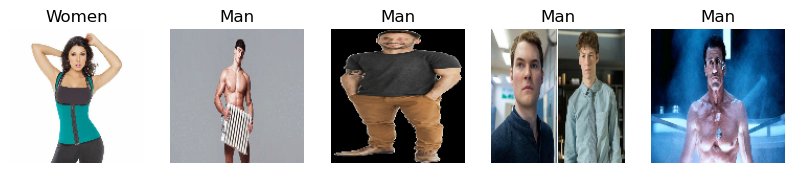

In [22]:
for data_batch,label_batch in train_dataset:
    print('data batch shape:', data_batch.shape)
    print('label batch shape:',label_batch.shape)

    fig,ax= plt.subplots(1,5,figsize=(10,3))
    for i,axe in enumerate(ax):
        axe.imshow(data_batch[i].numpy().astype('uint8'))
        axe.set_axis_off()
        axe.set_title('Man' if label_batch[i].numpy()==0 else 'Women')
    break

plt.show()

In [23]:
input=keras.Input(shape=(128,128,3))
x=layers.Rescaling(1./255)(input)
x=layers.Conv2D(filters=32,kernel_size=3,activation='relu')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=64,kernel_size=3,activation='relu')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=128,kernel_size=3,activation='relu')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=256,kernel_size=3,activation='relu')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=256,kernel_size=3,activation='relu')(x)
x=layers.Flatten()(x)
output=layers.Dense(1,activation='sigmoid')(x)
model=keras.Model(inputs=input,outputs=output)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 982,593 (3.75 MB)

 Trainable params: 982,593 (3.75 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
history=model.fit(train_dataset,epochs=30,validation_data=validation_dataset)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 277ms/step - accuracy: 0.5200 - loss: 0.6940 - val_accuracy: 0.4975 - val_loss: 0.6888
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - accuracy: 0.5188 - loss: 0.6913 - val_accuracy: 0.5825 - val_loss: 0.6839
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 209ms/step - accuracy: 0.5945 - loss: 0.6653 - val_accuracy: 0.6525 - val_loss: 0.6444
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 231ms/step - accuracy: 0.6352 - loss: 0.6364 - val_accuracy: 0.6425 - val_loss: 0.6186
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 220ms/step - accuracy: 0.6589 - loss: 0.6195 - val_accuracy: 0.6825 - val_loss: 0.5766
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - accuracy: 0.6865 - loss: 0.5894 - val_accuracy: 0.7275 - val_loss: 0.5365
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 235ms/step - accuracy: 0.7215 - loss: 0.5378 - val_accuracy: 0.6975 - val_loss: 0.5782
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - accuracy: 0.7397 - loss: 0.5033 - val_accu

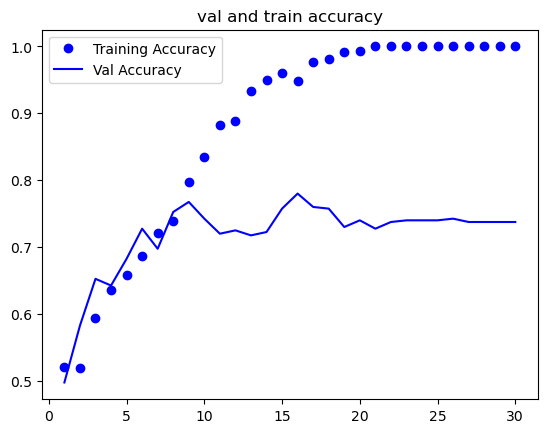

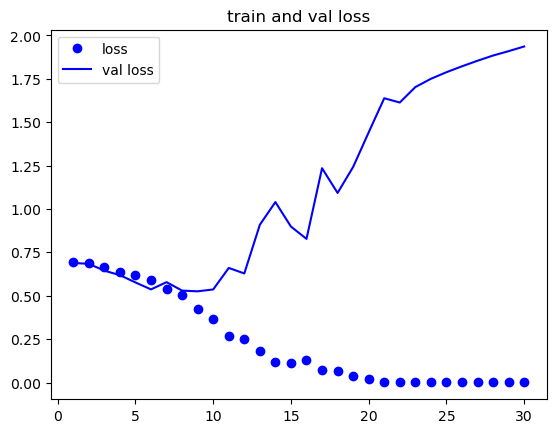

In [27]:
accuracy=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,'bo',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Val Accuracy")
plt.title("val and train accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label="loss")
plt.plot(epochs,val_loss,'b',label="val loss")
plt.title("train and val loss")
plt.legend()
plt.show()